<a href="https://colab.research.google.com/github/jyh11224/2025-DongA-University-Summer-School/blob/main/%EC%8B%A4%EC%8A%B55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 24s - 51ms/step - accuracy: 0.8989 - loss: 0.3973 - val_accuracy: 0.9502 - val_loss: 0.1734
Epoch 2/50
469/469 - 38s - 80ms/step - accuracy: 0.9584 - loss: 0.1428 - val_accuracy: 0.9668 - val_loss: 0.1155
Epoch 3/50
469/469 - 20s - 42ms/step - accuracy: 0.9722 - loss: 0.0968 - val_accuracy: 0.9714 - val_loss: 0.0930
Epoch 4/50
469/469 - 19s - 41ms/step - accuracy: 0.9794 - loss: 0.0702 - val_accuracy: 0.9738 - val_loss: 0.0807
Epoch 5/50
469/469 - 19s - 40ms/step - accuracy: 0.9852 - loss: 0.0526 - val_accuracy: 0.9763 - val_loss: 0.0750
Epoch 6/50
469/469 - 17s - 37ms/step - accuracy: 0.9884 - loss: 0.0407 - val_accuracy: 0.9781 - val_loss: 0.0717
Epoch 7/50
469/469 - 21s - 44ms/step - accuracy: 0.9912 - loss: 0.0311 - val_accuracy: 0.9793 - val_loss: 0.0643
Epoch 8/50
469/469 - 22s - 47ms/step - accuracy: 0.9937 - loss: 0.0237 - val_accuracy: 0.9807 - val_loss: 0.0643
Epoch 9/50
469/469 - 19s - 41ms/step - accuracy: 0.9959 - loss: 0.0174 - val_accuracy: 0.9781 - 

In [5]:
dmlp.save('dmlp_trained.h5')

In [6]:
import matplotlib.pyplot as plt

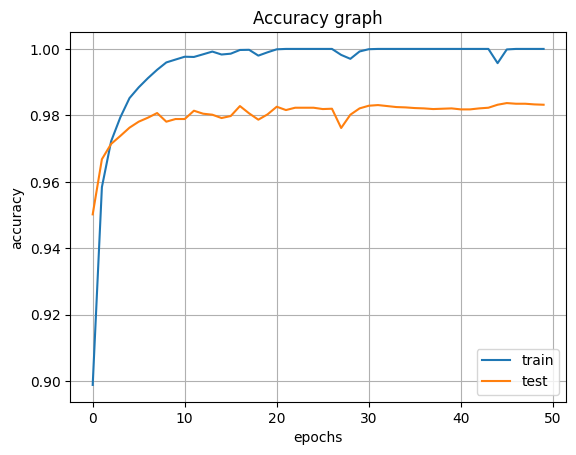

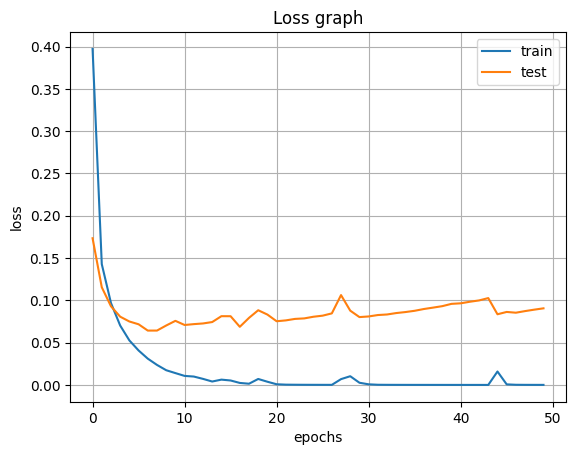

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()